In [24]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
file = Path.cwd()
file = file.parent
file = str(file) + "/data_cleanup/train_data_cleaned.csv"
print(file)

/home/matijak/Documents/programiranje/lumen/data_cleanup/train_data_cleaned.csv


In [7]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
0,0,73710,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0,2.0,2127.731
1,2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857
2,3,74461,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766
3,4,74466,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0,2.0,NaN
4,6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766


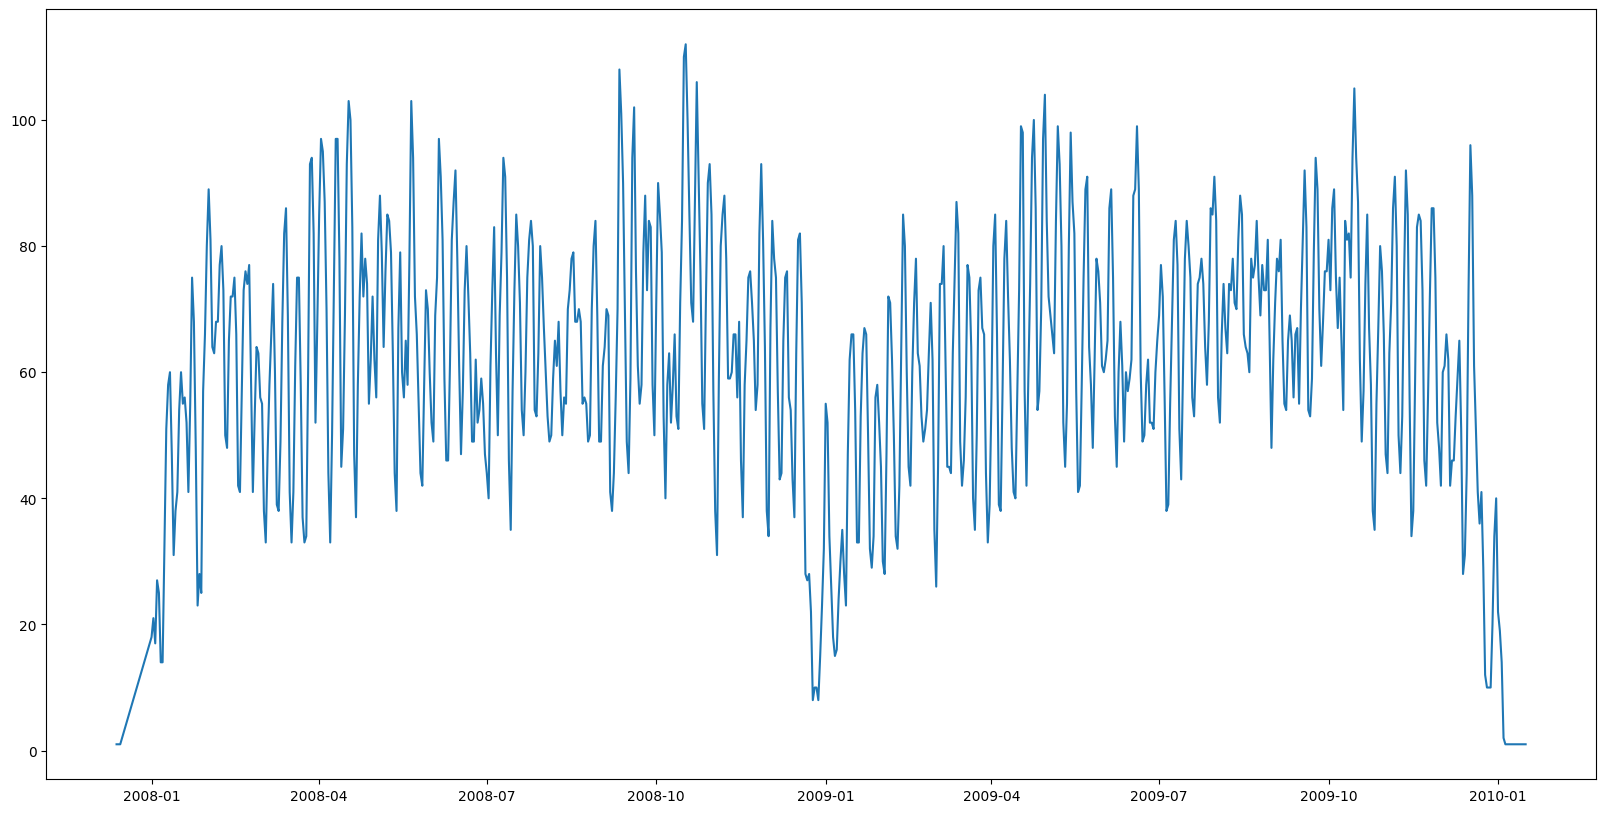

In [28]:
df['date_from'] = pd.to_datetime(df['date_from'])
df['date_to'] = pd.to_datetime(df['date_to'])
def expand_date_range(row):
    return pd.date_range(start=row['date_from'], end=row['date_to'], freq='D')
# Apply the function to expand the date range
expanded_dates = df.apply(expand_date_range, axis=1).explode()

# Count the occurrences of each date
reservations_per_date = expanded_dates.value_counts().reset_index()

# Rename columns
reservations_per_date.columns = ['date', 'number_of_reservations']
plt.figure(figsize = (20,10))
reservations_per_date.index = reservations_per_date['date']
reservations_per_date = reservations_per_date.sort_index()
#reservations_per_date.drop('date', axis=1, inplace=True)
plt.plot(reservations_per_date.index,reservations_per_date["number_of_reservations"])

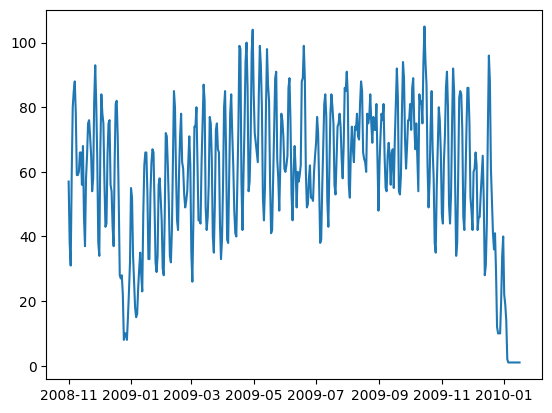

In [33]:
bplt.plot(df2.index,df2["number_of_reservations"])

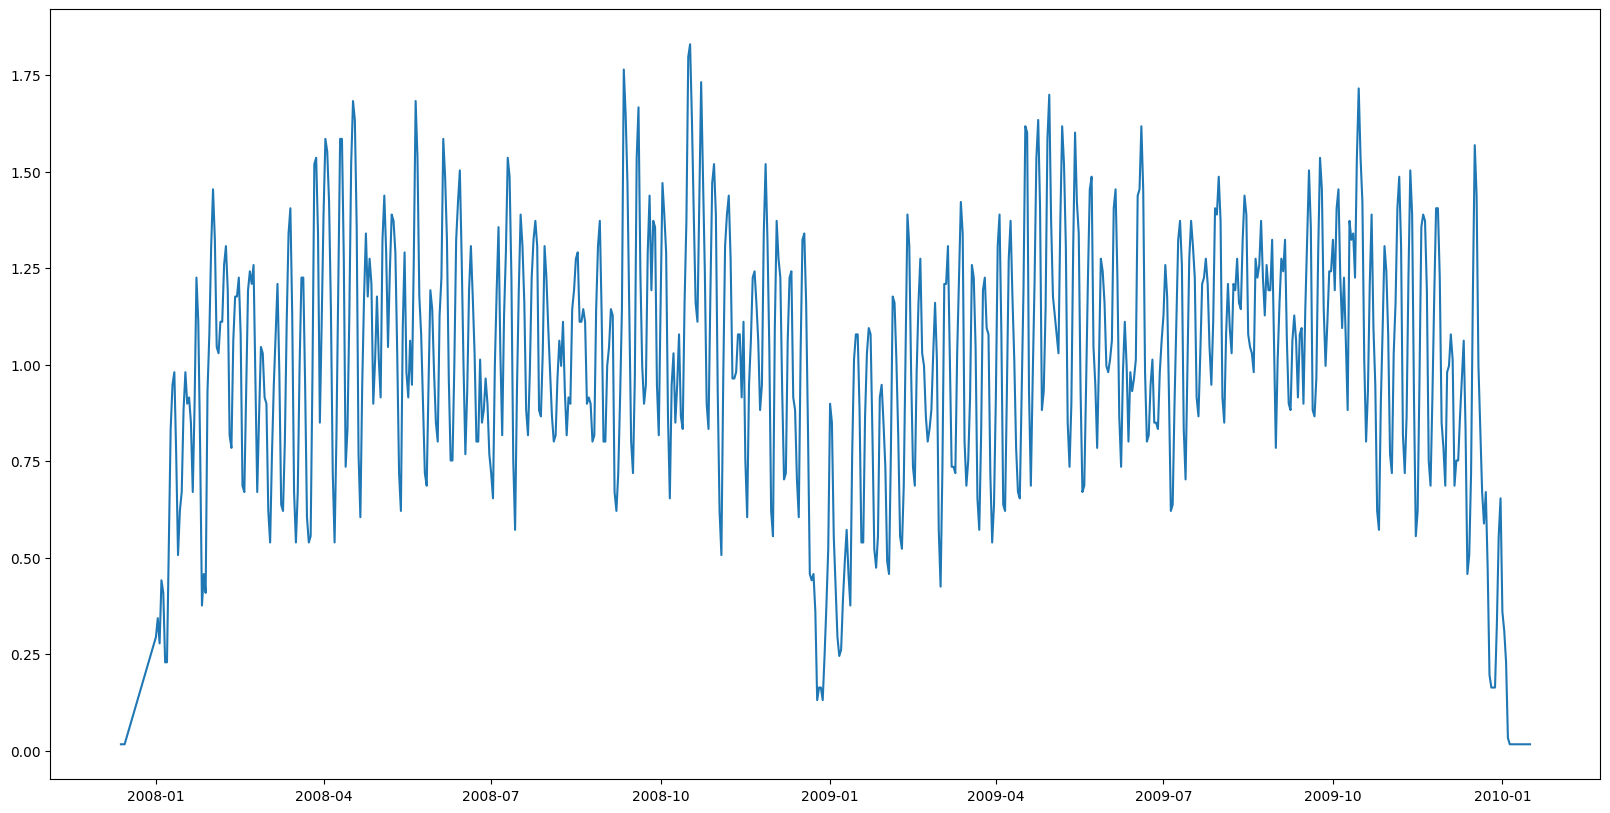

In [52]:
me = reservations_per_date['number_of_reservations'].mean()
reservations_per_date["avg_dev"] = reservations_per_date["number_of_reservations"]/me
plt.figure(figsize = (20,10))
plt.plot(reservations_per_date.index,reservations_per_date["avg_dev"])

DataFrame with the change in reservations from the previous year:


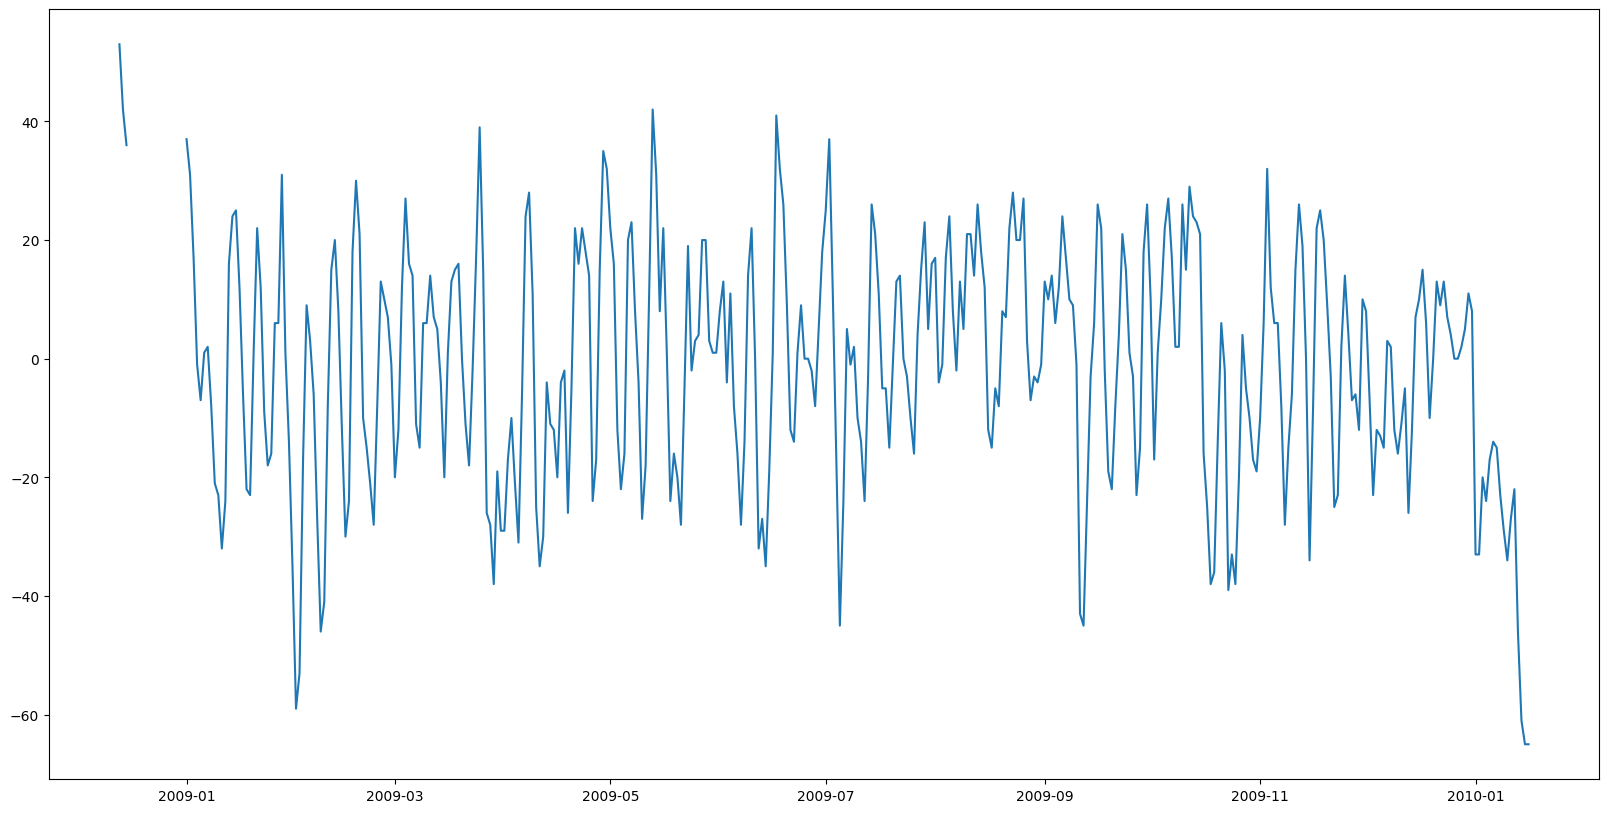

In [56]:
reservations_per_date['change_from_last_year'] = reservations_per_date.groupby([reservations_per_date.index.month, reservations_per_date.index.day])['number_of_reservations'].diff()
plt.figure(figsize = (20,10))
print("DataFrame with the change in reservations from the previous year:")
plt.plot(reservations_per_date.index, reservations_per_date["change_from_last_year"])

In [60]:
df3 = reservations_per_date.resample("ME")